# Super Store Sales Analysis
## Analyse sales data of Super Store mart and identify opportunities to boost business growth.
Super Store is a small retail business located in the United States. They sell Furniture, Office Supplies and Technology products, and their customers are the mass Consumer, Corporate and Home Offices.
The [data set(in CSV)](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final) contains sales, profit and geographical information of Super Store. [Dataset in Excel](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls).
Our task is to analyse the sales data and identify weak areas and opportunities for "Super-Store" to boost business growth.

### Business Questions
- Which Category is Best Selling and Most Profitable?
- What are the Best Selling and Most Profitable Sub-Category?
- Which is the Top Selling Sub-Category?
- Which Customer Segment is Most Profitable?
- Which is the Preferred Ship Mode?
- Which Region is the Most Profitable?
- Which City has the Highest Number of Sales?

### Preparing the Environment
We will import the required libraries and read in the data set.
- Pandas — Data manipulation
- Matplotlib and Seaborn — Data visualisation

In [1]:
# Import libraries and alias for easy reading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## About Dataset
### Context
With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid. 

// TODO
You can even take this a step further and try and build a Regression model to predict Sales or Profit.

### Metadata
- Row ID => Unique ID for each row.
- Order ID => Unique Order ID for each Customer.
- Order Date => Order Date of the product.
- Ship Date => Shipping Date of the Product.
- Ship Mode=> Shipping Mode specified by the Customer.
- Customer ID => Unique ID to identify each Customer.
- Customer Name => Name of the Customer.
- Segment => The segment where the Customer belongs.
- Country => Customer's country of residence.
- City =>  Customer's City of residence.
- State =>  Customer's state of residence.
- Postal Code => Postal Code of every Customer.
- Region => Region where the Customer belongs.
- Product ID => Unique ID of the Product.
- Category => Category of the product ordered.
- Sub-Category => Sub-Category of the product ordered.
- Product Name => Name of the Product.
- Sales => Sales of the Product.
- Quantity => Quantity of the Product.
- Discount => Discount provided.
- Profit => Profit/Loss incurred.

In [2]:
# Read data and set to a dataframe 
df = pd.read_excel('./Dataset/Superstore.xls')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


### Data Exploration
Let’s have a look at the data using df.head() and df.tail() function.

In [5]:
# Preview first 5 rows of data set
df.head() # defaults to 5

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Preview last 5 rows of data set
df.tail() # defaults to 5

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [6]:
# Show more rows in head() or tail()
df.head(8) # parameter to show n rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152


You can easily tell that there is a mix of categorical, geographical and numerical variables.
Each row represents an order of an item and the corresponding quantity, sales, discount and profit. There is also the mode of shipment, customer segment and geographical aspects.
Next, we will use the **df.shape, df.info() and df.describe()** to get more information.

In [7]:
# Shape of data set
df.shape # This is an attribute not a method

(9994, 21)

In [8]:
df.shape() # This is an attribute not a method, hence error here

TypeError: 'tuple' object is not callable

In [9]:
# Summarised information of data set
df.info() # this is kind of a meta function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

There are 9,994 rows (***excluding*** *header*) and 13 columns. Data type is correct and matches the corresponding values.

**df.describe()** generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided.

We will talk a bit more about this later.

In [11]:
# Calculates some statistical data like percentile, mean and std of the numerical values 
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Data Cleaning
Before we start with the analysis, we must first clean the data or “scrub the dirt.”
For this analysis, we will look at the more common issues such as missing and duplicate data.
<br/>
#### Handling Missing Values
Here, we will find out whether there is Null value.

In [13]:
# Find the number of null values for all columns
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

The result shows that the data set does not have any null value.
<br/>
### Duplicate Data
Then, we will find out whether there is duplicate data.

In [15]:
# Find the number of duplicate data
df.duplicated().sum()

0

The Result shows that there are **0** duplicated rows. If it had any duplicates, we could have used another function to view the duplicated data.

In [16]:
# Show the duplicated rows
df[df.duplicated(keep = 'last')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


We could then run the drop_duplicates() function to drop the duplicated rows.

In [17]:
# Drop the duplicated rows
df.drop_duplicates(inplace = True)

# Find the number of rows and columns
df.shape

(9994, 21)

Also, it is a good practice to name dataframes with some context and avoid using a generic name like df. It helps in working with multiple datasets. 

In [19]:
superstore = df

### Calculated Field
Now, we will create a calculated field for Profit Margin. The formula is (Profit / Sales) * 100.

In [20]:
superstore['Profit Margin %'] = (superstore.Profit / superstore.Sales) * 100
superstore

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin %
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,16.25
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,17.00
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,7.50
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,45.00


Observe the last column above.
Now that the data set has been scrubbed, we can proceed with some statistics analysis!
<br/>
### Descriptive Statistics
Here, we will do a descriptive statistical analysis. We use df.describe() and assign ‘include = ‘all’ to ensure that categorical features are also included in the output.

In [24]:
# Get descriptive statistics summary
superstore.describe(include = "all")

C:\Users\manan\AppData\Local\Temp\ipykernel_10788\754186322.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  superstore.describe(include = "all")
C:\Users\manan\AppData\Local\Temp\ipykernel_10788\754186322.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  superstore.describe(include = "all")


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin %
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,4,1862,3,17,1850,NaN,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,2016-09-05 00:00:00,2015-12-16 00:00:00,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,3203,19,6026,1523,48,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896,12.031393
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108,46.675435
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750,7.500000


You will see ‘NaN’ in some of the categorical columns and that’s perfectly fine. Categorical values are not meant to have calculations performed on them, so we can ignore those. These are commonly Text fields, hence NaN: Not a Number. Observe the difference from the output earlier of the same method without include=="all" parameter.

What we want to focus on is the unique count and frequency of the categorical features such as
- There are 4 ship modes and 3 customer segments. Nearly half of the orders are from the Consumer segment using Standard Class shipment.
- The store carries 3 category of items with 17 "sub-category." 60% of orders are for Office Supplies, and at least 15 % of purchases are for Binders.

While for numerical parameters, it’s interesting to note that 
- 75% of orders makes at least 36% profit margin.
- Loss-making orders can go up to 275% losses. We must place emphasis on these loss-making sales to cut them off.

We will perform some analysis below to test these observations.

### Exploratory Data Analysis
1. Which Category is Best Selling and Most Profitable?
Best Selling means looking at the Sales and Most Profitable is referring to the Profit. We will group the Sales, Profit and also Quantity by Category and run the df.group().sum and pd.DataFrame() functions.

In [25]:
# Group sales, profit and quantity by category
category_analysis = pd.DataFrame(superstore.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741999.7953,18451.2728,8028
Office Supplies,719047.0320,122490.8008,22906
Technology,836154.0330,145454.9481,6939


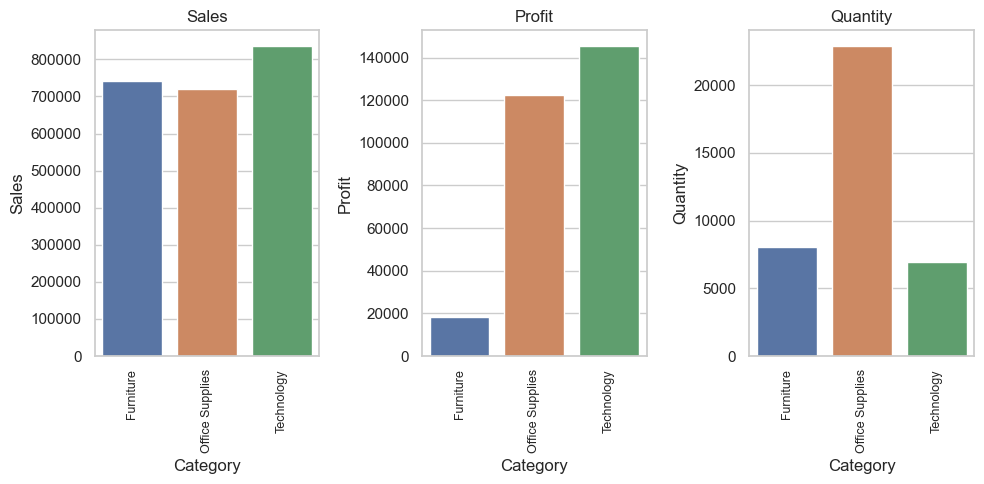

In [28]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(10, 5))

# Plot barplots
cat_furniture = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
cat_office_supplies = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
cat_technology = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])

# Set titles
cat_furniture.set(title = 'Sales')
cat_office_supplies.set(title = 'Profit')
cat_technology.set(title = 'Quantity')

# Rotate axis for x-axis
plt.setp(cat_furniture.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat_office_supplies.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat_technology.get_xticklabels(), rotation = 'vertical', size = 9)

# Set spacing between subplots
figure.tight_layout()

Our observations are:

- All 3 categories — Furniture, Office Supplies and Technology make similar amount of sales.
- Technology is Best Selling and it’s good to know that this category is the Most Profitable too. Only minimal quantity is sold as these products are usually one-off purchases that can last at least 4–5 years.
- Although Furniture makes similar sales as Technology, it is the least profitable and quantity sold are at a minimum too.
- Office Supplies sells the most in terms of quantity as it is relatively cheap product.
<br/>

### 2. What are the Best Selling and Most Profitable Sub-Category?

In [29]:
# Group by sub-category
subcat_analysis = pd.DataFrame(superstore.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [30]:
# Sort by descending order according to profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78479.2060,34053.5693
Binders,203412.7330,30221.7633
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91705.1640,13059.1436


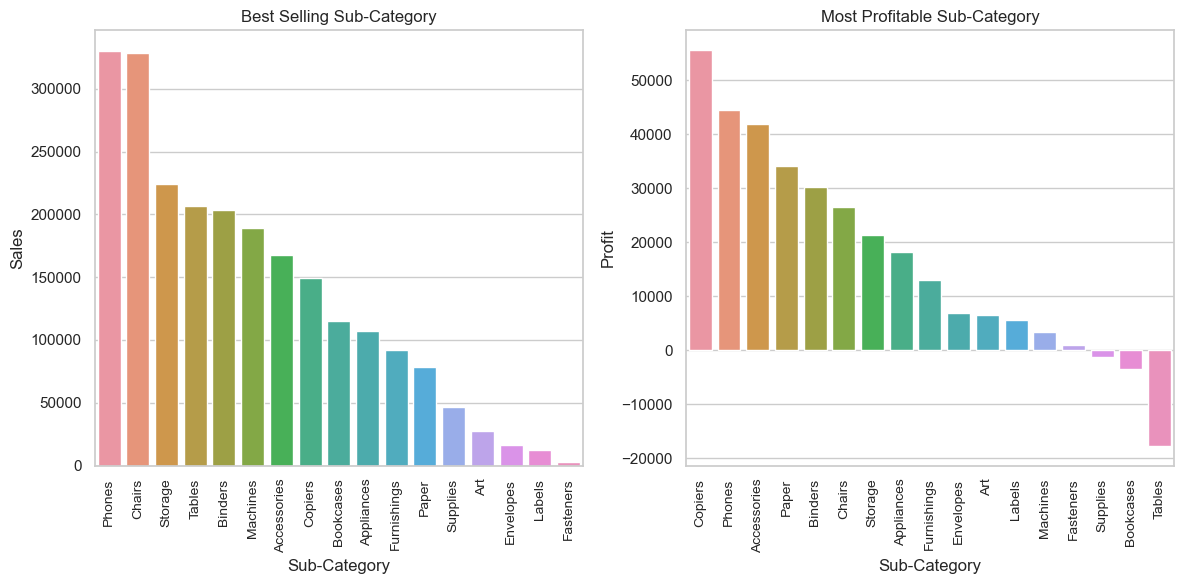

In [31]:
# Plot Bar Plots
sns.set_theme(style="whitegrid")

# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

# Set spacing between subplots
figure.tight_layout()
plt.show()

Let’s analyse the bar plots:

- Phones and Chairs are the Top 2 best-selling sub-categories.
- Copiers produce most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.
- On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margins to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.

### 3. Which is the Top Selling Sub-Category?

In [32]:
subcat_quantity = pd.DataFrame(superstore.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5974
Paper,5178
Furnishings,3563
Phones,3289
Storage,3158
Art,3000
Accessories,2976
Chairs,2356
Appliances,1729


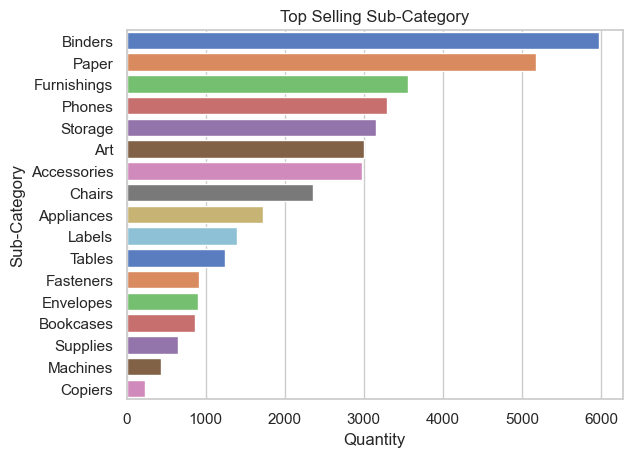

In [33]:
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

Here, we can deduce that

- Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.
- Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.
<br/>

### 4. Which Customer Segment is Most Profitable?

In [34]:
segment_analysis = pd.DataFrame(superstore.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


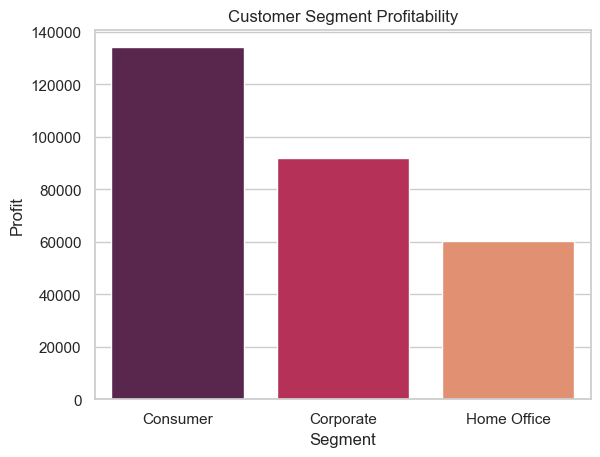

In [35]:
# Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

The Consumer segment is most profitable, followed by Corporate Segment and Home Office. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers.
<br/>

### 5. Which is the Preferred Ship Mode?

C:\Users\manan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


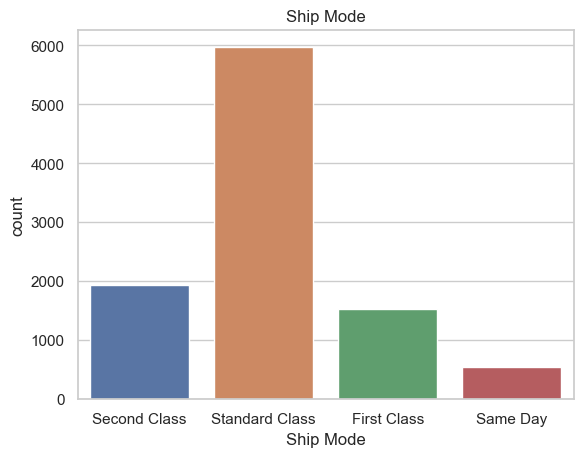

In [36]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(superstore['Ship Mode'])
plt.title("Ship Mode")
plt.show()

By a landslide, Standard Class is the preferred method of shipment and perhaps the cheapest one too. The other modes are not popular among the customers and may be too costly.
<br/>

### 6. Which Region is the Most Profitable?

In [37]:
region_analysis = pd.DataFrame(superstore.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


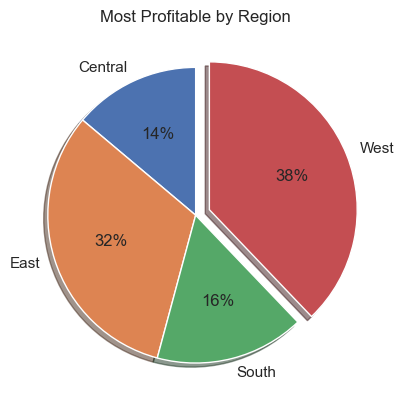

In [38]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]
plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")
plt.show()

East and West region are most profitable.
<br/>

### 7. Which cities have the highest and lowest number of sales?

In [39]:
city_sales = pd.DataFrame(superstore.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))
top10 = city_sales[:10]
top10

C:\Users\manan\AppData\Local\Temp\ipykernel_10788\3922056873.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_sales = pd.DataFrame(superstore.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))


,Sales,Quantity
City,,
New York City,256368.1610,3417
Los Angeles,175851.3410,2879
Seattle,119540.7420,1590
San Francisco,112669.0920,1935
Philadelphia,109077.0130,1981
Houston,64504.7604,1466
Chicago,48539.5410,1132
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [40]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


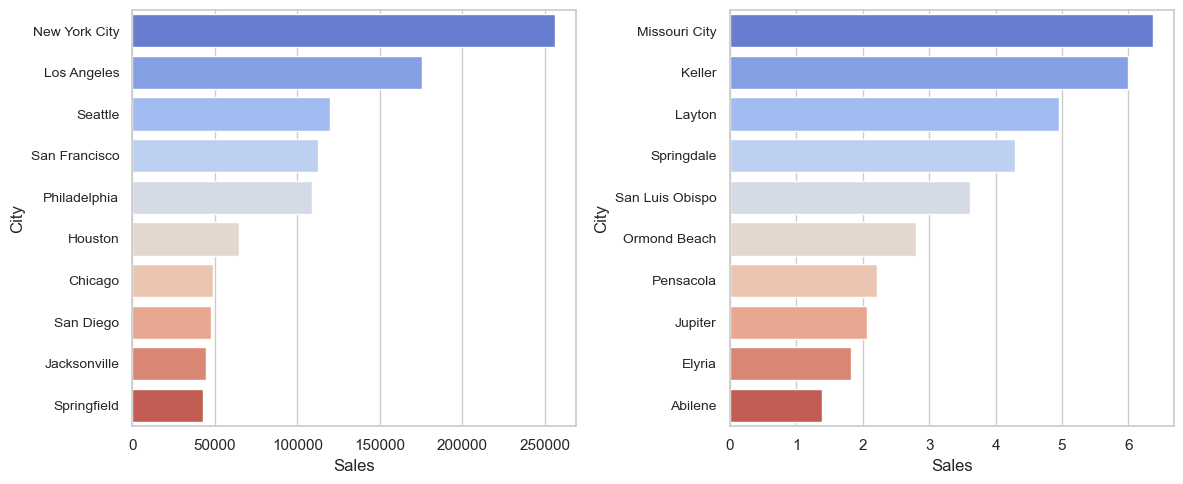

In [50]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme(style="whitegrid")

top10chart = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "coolwarm", ax = axis[0])
top10chart.set_yticklabels(top10chart.get_yticklabels(),size = 10)

# Plot Bar Plot for Best Selling Sub-Category
bottom10chart = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = "coolwarm", ax=axis[1])
bottom10chart.set_yticklabels(bottom10chart.get_yticklabels(),size = 10)

# Set spacing between subplots
figure.tight_layout()
plt.show()

There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target the top 10 cities.

## Strategic Recommendation
Here, we revisit our business questions and share with you our high-level business recommendations.

### Business Questions
- Which Category is Best Selling and Most Profitable?
- What are the Best Selling and Most Profitable Sub-Category?
- Which is the Top Selling Sub-Category?
- Which Customer Segment is Most Profitable?
- Which is the Preferred Ship Mode?
- Which Region is the Most Profitable?

## Recommendations
- Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.
- Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.
- For Home Office customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.
- For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.The 
- The Consumer and Corporate Segment make up more than 70% of customer base. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.